In [88]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import utils as ut

system_name = 'dql_const'
run_name = 'loss'
data_dir = './data/' + system_name + '/' + run_name + '/'
#plot_dir = '../plots/'+system_name+'/'+run_name+'/'

## Learning of the 3d kite - relative velocity angle- with sarsa

In [89]:
params = ut.read_params(data_dir+'parameters.txt')
for ep in params:
    print(ep, params[ep])

integration_step 0.001
episode_duration 500.0
learning_step 0.2
penalty 180.0
wind_type const
v_wind_x 10.0
v_wind_y 0.0
v_wind_z 0.0
learning_type dql
gamma 1.0
episodes 300.0
eta0 0.0001
eta_decay_start 10000.0
eta_decay_rate 0.9
eta_c 1000.0
eps0 0.0001
eps_decay_start 800000.0
eps_decay_rate 1.3
eps_c 1.0
optimizer sgd
loss mse
max_power 0.0


In [90]:
# read durations and returns
d_traj, r_traj = ut.read_traj(data_dir+'/return.txt')

l_steps = np.cumsum(d_traj)
print(l_steps)

[     2      6   2158   2170   3560   4725   6015   6288   8788  11288
  13788  15450  17950  19908  22408  23013  25513  26459  26665  26688
  28079  30579  33079  35579  37302  39530  39540  39549  39564  40550
  41496  41779  44279  46779  48283  50783  53283  55783  58094  59514
  59527  59545  60828  62207  62988  63023  64006  65640  68140  68165
  70665  73165  75665  78165  80665  82907  82915  82924  85424  87924
  90424  90426  92096  92111  92130  92178  93237  94993  97493  99993
 102493 104993 107493 109993 112493 114993 117493 119993 122493 124993
 127493 129993 132493 134993 137493 139993 142493 144993 147493 149993
 152493 154993 157493 159993 162493 164993 167493 169993 172493 174993
 177493 179993 182493 184993 187493 189993 192493 194993 197493 199993
 202493 204993 207493 209993 212493 214993 217493 219993 222493 224993
 227493 229993 232493 234993 237493 239993 242493 244993 247493 249993
 252493 254993 257493 259993 262493 264993 267493 269993 272493 274993
 27749

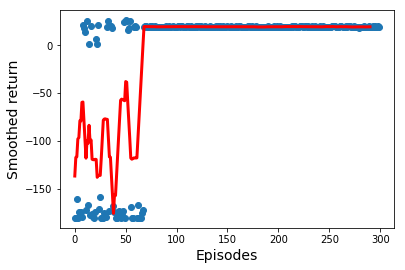

In [91]:
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Smoothed return', fontsize=14)

plt.plot(r_traj, 'o')

smooth = np.convolve(r_traj, np.ones(10), "valid")/10
plt.plot(smooth, color='red', lw=3)

plt.savefig(data_dir+'return.png', dpi=200)
plt.show()

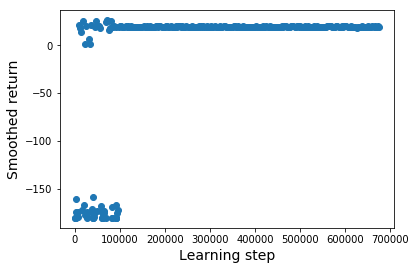

In [92]:
plt.xlabel('Learning step', fontsize=14)
plt.ylabel('Smoothed return', fontsize=14)

plt.plot(l_steps, r_traj, 'o')

#smooth = np.convolve(r_traj, np.ones(100))/100
#plt.plot(l_steps, smooth, color='red', lw=3)

plt.show()

(751, 15, 7, 3, 3)


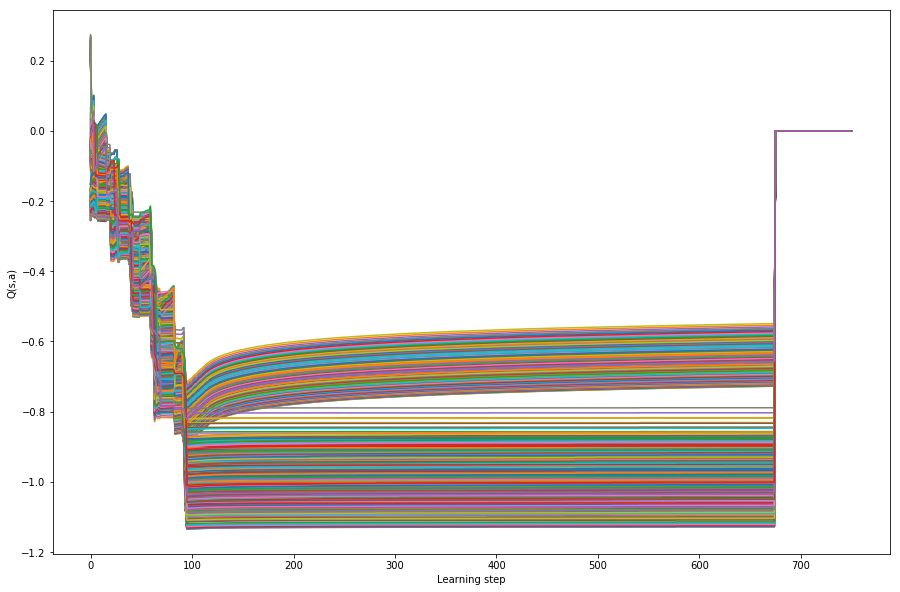

In [93]:
Q_traj = np.load(data_dir+"quality_traj.npy")
print(Q_traj.shape)

Q_traj = Q_traj.reshape(Q_traj.shape[0], -1)
#print(Q_traj.shape)

plt.figure(figsize = (15,10))
for i in range(Q_traj.shape[1]):
    plt.plot(Q_traj[0:10000,i])
plt.ylabel("Q(s,a)")
plt.xlabel("Learning step")
plt.savefig(data_dir+"quality_traj.png")
plt.show()

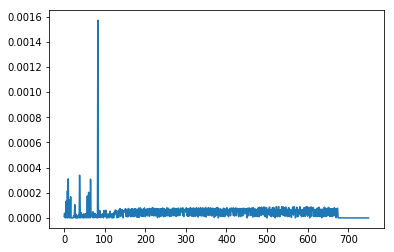

In [95]:
l = np.load(data_dir+"loss_traj.npy")
plt.plot(l)
plt.show()

In [81]:
Q = np.load(data_dir+"best_quality.npy")
ind = np.argmax(Q_traj[4800])
np.unravel_index(ind, Q.shape)

FileNotFoundError: [Errno 2] No such file or directory: './data/dql_const/sota2/best_quality.npy'

[25.          0.         43.30127019]


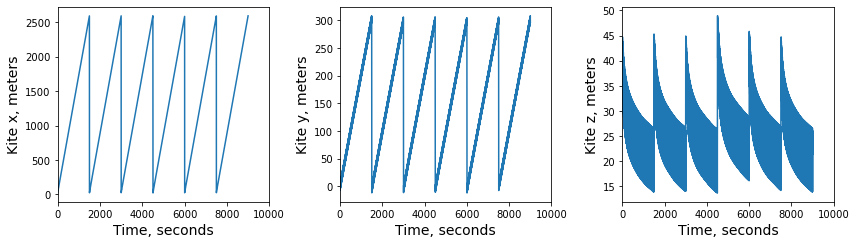

In [93]:
coordinates = np.load(data_dir+"eval_traj.npy")
controls = np.load(data_dir+"contr_traj.npy")
print(coordinates[0])

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

lim = [0,10000]

ax1.set_xlim(lim)
ax1.set_xlabel('Time, seconds', fontsize=14)
ax1.set_ylabel('Kite x, meters', fontsize=14)
ax1.plot(coordinates[:,0])

ax2.set_xlim(lim)
ax2.set_xlabel('Time, seconds', fontsize=14)
ax2.set_ylabel('Kite y, meters', fontsize=14)
ax2.plot(coordinates[:,1])

ax3.set_xlim(lim)
ax3.set_xlabel('Time, seconds', fontsize=14)
ax3.set_ylabel('Kite z, meters', fontsize=14)
ax3.plot(coordinates[:,2])

plt.tight_layout()
plt.savefig(data_dir+"eval_traj.png", dpi=200)
plt.show()

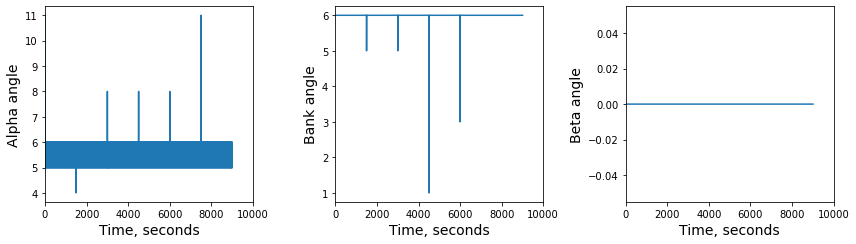

In [94]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

lim = [0,10000]

ax1.set_xlim(lim)
ax1.set_xlabel('Time, seconds', fontsize=14)
ax1.set_ylabel('Alpha angle', fontsize=14)
ax1.plot(controls[:,0])

ax2.set_xlim(lim)
ax2.set_xlabel('Time, seconds', fontsize=14)
ax2.set_ylabel('Bank angle', fontsize=14)
ax2.plot(controls[:,1])

ax3.set_xlim(lim)
ax3.set_xlabel('Time, seconds', fontsize=14)
ax3.set_ylabel('Beta angle', fontsize=14)
ax3.plot(controls[:,2])

plt.tight_layout()
plt.savefig(data_dir+"contr_traj.png", dpi=200)
plt.show()

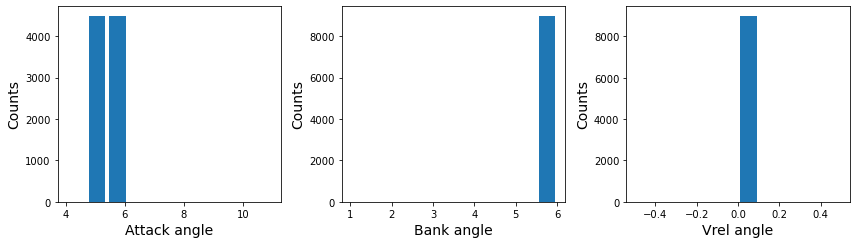

In [95]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

ax1.set_ylabel('Counts', fontsize=14)
ax1.set_xlabel('Attack angle', fontsize=14)
ax1.hist(controls[:,0], align='mid', rwidth=0.8)

ax2.set_ylabel('Counts', fontsize=14)
ax2.set_xlabel('Bank angle', fontsize=14)
ax2.hist(controls[:,1], align='mid', rwidth=0.8)

ax3.set_ylabel('Counts', fontsize=14)
ax3.set_xlabel('Vrel angle', fontsize=14)
ax3.hist(controls[:,2], align='mid', rwidth=0.8)

plt.tight_layout()
plt.savefig(data_dir+"contr_hist.png", dpi=200)
plt.show()